# **Patent Landscape Analysis in Electric vs. Hybrid Vehicle Technologies**
*Dissertation (Shaurya Rawat)*

## Importing all the required libraries for the project

Importing essential libraries for data analysis, visualization, NLP, and statistical testing
These libraries enable data manipulation (pandas, numpy), plotting (matplotlib, seaborn),text processing (sklearn, nltk), sentiment analysis (textblob), word clouds (wordcloud),and statistical tests (scipy.stats)

In [1]:
# Importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from scipy.stats import chi2_contingency, ttest_ind
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import TextBlob
import uuid

In [2]:
# Downloading NLTK stopwords for text preprocessing, Stopwords are common words (e.g., 'the', 'is') removed to focus on meaningful terms
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

This initial block sets up the environment by importing libraries needed for data processing, visualization, and analysis. It prepares tools for handling patent data, performing NLP tasks like topic modeling, generating visualizations, and conducting statistical tests to compare EV and HEV innovation trends. The NLTK stopwords download ensures text preprocessing can filter out irrelevant words, aligning with the technical professor’s emphasis on advanced NLP.

## Importing the Data

In [3]:
# Load the patent dataset from a the dataset(CSV file), sourced from Google Patents
df = pd.read_csv('DATA.csv')

This block reads the patent dataset into a pandas DataFrame, enabling analysis of EV and HEV patents from 2014–2024. The dataset includes critical fields for identifying innovation trends.

In [4]:
# Display the first few rows
df.head()

,publication_number,title,abstract,filing_date,publication_date,assignee_names,inventor_names,cpc_codes,ipc_codes
0,US-2021407880-A1,Power module for operating an electric vehicle...,A power module for operating an electric vehic...,20210629,20211230,ZAHNRADFABRIK FRIEDRICHSHAFEN,EWALD AKE,"H02M7/5395, H02M7/003, H02P27/085, H05K7/20927...","H01L25/16, H01L23/367, H02M7/00"
1,US-2022126725-A1,Method for scheduling multi agent and unmanned...,A method for scheduling EV battery swap based ...,20210123,20220428,UNIV HARBIN ENG,"WANG TONG, YANG GUANGXIN, WANG YU, GAO SHAN, C...","H04W4/44, H04W4/08, H04W4/023, Y04S10/126, Y02...","B60L53/67, H04W4/44, B60L53/80, B60L53/66, B60..."
2,US-2024262243-A1,Hybrid vehicle charging including during stand...,A mild hybrid electric vehicle includes an eng...,20240205,20240808,FCA US LLC,"TULLER ZACHARY L, SADEKAR GUARAV S, PATEL NADI...","B60L58/20, B60L58/12, B60L2260/22, B60Y2200/92","B60L58/20, B60L58/12"
3,US-2018212208-A1,Battery Module for an Electric Vehicle,A polymer composition that can be employed in ...,20180119,20180726,TICONA LLC,KIM YOUNG SHIN,"H01M10/052, H01M10/6554, C08L2201/08, H01M10/6...","C08L81/04, H01M10/052, H01M50/293, H01M50/291,..."
4,US-2018281609-A1,Three-phase or single-phase electric charger s...,An electric system to charge a battery on a ve...,20180330,20181004,VALEO SIEMENS EAUTOMOTIVE FRANCE SAS,"YANG GANG, BOUCHEZ BORIS","B60L2210/10, H02M3/285, B60L53/22, B60L2210/30...","H02J7/02, B60L11/18, H02M3/158"


In [5]:
# Display the last few rows
df.tail()

,publication_number,title,abstract,filing_date,publication_date,assignee_names,inventor_names,cpc_codes,ipc_codes
113554,JP-2023020513-A,Hybrid vehicle,To suppress the generation of a relatively lar...,20210730,20230209,TOYOTA MOTOR CORP,SUGIMOTO HITOSHI,Y02T10/62,"B60W10/08, B60K6/445, B60W10/06, B60W20/17"
113555,CN-105121243-A,Hybrid vehicle drive device,This hybrid vehicle drive device is provided w...,20130416,20151202,TOYOTA MOTOR CORP,"HASHIMOTO HIROTO, YUJI IWASE, EBUCHI HIROAKI, ...","B60K6/445, Y10S903/93, B60W2710/027, B60K2006/...","B60L50/16, B60W20/00, B60W10/08, F16D48/06"
113556,JP-2022141340-A,Electric vehicle and charging control method f...,To perform external charging capable of suppre...,20210315,20220929,TOYOTA MOTOR CORP,MISAWA TAKAHIRO,"B60L53/20, B60L53/00, B60L58/12, B60L50/16, B6...","H02J7/02, H02J7/04, B60L58/12, B60L53/20, H02J..."
113557,JP-2022077768-A,Engine misfire detection device for hybrid veh...,To enhance detection accuracy of a continuous ...,20201112,20220524,TOYOTA MOTOR CORP,"HOTTA SHINTARO, TAKAHASHI HIROYA, IGUMA HIROKI...","F02D41/22, F02B77/08, G01M15/11, F02D41/0097, ...","F02D45/00, B60W20/00, F02D29/06, B60W10/06, B6..."
113558,CN-103958310-A,Gear shift indicating device for hybrid vehicle,A gear shift indicating device for a hybrid ve...,20111124,20140730,TOYOTA MOTOR CORP,"SATO KEITA, FUKUSHIRO EIJI","B60Y2400/71, F16H63/42, F16H2063/426, B60W20/1...","B60L50/16, B60K6/547, B60W10/101, B60W10/115, ..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113559 entries, 0 to 113558
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   publication_number  113559 non-null  object
 1   title               113559 non-null  object
 2   abstract            103017 non-null  object
 3   filing_date         113559 non-null  int64 
 4   publication_date    113559 non-null  int64 
 5   assignee_names      98747 non-null   object
 6   inventor_names      97871 non-null   object
 7   cpc_codes           93090 non-null   object
 8   ipc_codes           112566 non-null  object
dtypes: int64(2), object(7)
memory usage: 7.8+ MB


## Data Cleaning, Exploring and Preprocessing

Cleaning critical columns by removing rows with missing title or publication date, Ensures only complete records are analyzed to maintain data integrity.

In [7]:
# 3. Handle missing critical values
df = df.dropna(subset=['title', 'publication_date'])

Standardizing publication dates to datetime format and extract year
Converts date strings (YYYYMMDD) to datetime for time-series analysis and drops invalid dates

In [8]:
# 4. Convert and standardize dates
df['publication_date'] = pd.to_datetime(df['publication_date'].astype(str), format='%Y%m%d', errors='coerce')
df = df.dropna(subset=['publication_date'])
df['year'] = df['publication_date'].dt.year

Removing duplicate patents based on publication number, Prevents double-counting of identical patents, ensuring accurate trend analysis

In [9]:
# 5. Remove duplicate patents
df = df.drop_duplicates(subset=['publication_number'])

Imputing missing values in non-critical columns, Filling empty abstracts with '' and assignee/inventor names with 'MIX' to retain records

In [10]:
# 6. Fill or impute less critical missing values
df['abstract'] = df['abstract'].fillna('')
df['assignee_names'] = df['assignee_names'].fillna('MIX')
df['inventor_names'] = df['inventor_names'].fillna('MIX')
df['cpc_codes'] = df['cpc_codes'].fillna('')

This section prepares the dataset by removing incomplete records, standardizing dates, eliminating duplicates, and imputing missing values. These steps ensure a clean dataset for reliable analysis.

## Feature engineering
Parsing CPC codes into lists for classification, Spliting comma-separated CPC codes into lists for easier processing and Flaging EV and HEV patents using CPC codes, Identifing EV patents (B60L) and HEV patents (B60W) based on CPC codes

In [11]:
# Parse CPC codes
df['cpc_list'] = df['cpc_codes'].str.split(r',\s*')
df['is_ev'] = df['cpc_list'].apply(lambda codes: any(code.startswith('B60L') for code in codes))
df['is_hev'] = df['cpc_list'].apply(lambda codes: any(code.startswith('B60W') for code in codes))

Adding keyword-based flags for EV and HEV and Search titles and abstracts for 'electric vehicle' or 'hybrid car' to capture additional patents

In [12]:
# Adding keyword filtering
df['is_ev_keyword'] = df['title'].str.lower().str.contains('electric vehicle', na=False) | df['abstract'].str.lower().str.contains('electric vehicle', na=False)
df['is_hev_keyword'] = df['title'].str.lower().str.contains('hybrid car', na=False) | df['abstract'].str.lower().str.contains('hybrid car', na=False)

Combining CPC and keyword flags for comprehensive classification and Ensuring patents are correctly categorized as EV or HEV using both methods

In [13]:
# Combine CPC and keyword flags
df['is_ev_final'] = df['is_ev'] | df['is_ev_keyword']
df['is_hev_final'] = df['is_hev'] | df['is_hev_keyword']

Flaging specific technologies for business factors: Identifing powertrain (B60L9 for EV, B60L11 for HEV), battery (Y02T10/70), autonomous, and connected technology patents using CPC codes and keywords

In [14]:
# Add specific technology flags for business factors
df['is_powertrain_ev'] = df['cpc_list'].apply(lambda codes: any(code.startswith('B60L9') for code in codes))
df['is_powertrain_hev'] = df['cpc_list'].apply(lambda codes: any(code.startswith('B60L11') for code in codes))
df['is_battery'] = df['cpc_list'].apply(lambda codes: any(code.startswith('Y02T10/70') for code in codes))
df['is_autonomous'] = df['title'].str.lower().str.contains('autonomous|self-driving', na=False) | df['abstract'].str.lower().str.contains('autonomous|self-driving', na=False)
df['is_connected'] = df['title'].str.lower().str.contains('connected|v2x|iot', na=False) | df['abstract'].str.lower().str.contains('connected|v2x|iot', na=False)

Flaging patents related to business factors using keywords


In [15]:
# Keyword flags for business factors
env_keywords = ['emissions', 'carbon', 'sustainability']
cost_keywords = ['cost', 'affordable', 'economical']
maintenance_keywords = ['maintenance', 'durability', 'longevity']
market_keywords = ['commercial', 'market', 'adoption']
regulation_keywords = ['regulation', 'standard', 'compliance']

df['is_environmental'] = df['title'].str.lower().str.contains('|'.join(env_keywords), na=False) | df['abstract'].str.lower().str.contains('|'.join(env_keywords), na=False)
df['is_cost'] = df['title'].str.lower().str.contains('|'.join(cost_keywords), na=False) | df['abstract'].str.lower().str.contains('|'.join(cost_keywords), na=False)
df['is_maintenance'] = df['title'].str.lower().str.contains('|'.join(maintenance_keywords), na=False) | df['abstract'].str.lower().str.contains('|'.join(maintenance_keywords), na=False)
df['is_market'] = df['title'].str.lower().str.contains('|'.join(market_keywords), na=False) | df['abstract'].str.lower().str.contains('|'.join(market_keywords), na=False)
df['is_regulation'] = df['title'].str.lower().str.contains('|'.join(regulation_keywords), na=False) | df['abstract'].str.lower().str.contains('|'.join(regulation_keywords), na=False)

This block enhances the dataset by creating features to classify patents and align with the business factors. It parses CPC codes, flags EV and HEV patents using both CPC codes and keywords, and identifies patents related to powertrain, battery, autonomous, and connected technologies. Keyword searches for environmental, cost, and other factors address business considerations.

### Summarize missingness for all columns
Generating a table to assess data quality and ensure robustness of analysis

In [16]:
# Analyzing missingness for all columns
missing_pct = (df.isna().mean() * 100).round(2).reset_index()
missing_pct.columns = ['column', 'percent_missing']
print("Missing Data Summary:")
print(missing_pct)

Missing Data Summary:
                column  percent_missing
0   publication_number             0.00
1                title             0.00
2             abstract             0.00
3          filing_date             0.00
4     publication_date             0.00
5       assignee_names             0.00
6       inventor_names             0.00
7            cpc_codes             0.00
8            ipc_codes             0.87
9                 year             0.00
10            cpc_list             0.00
11               is_ev             0.00
12              is_hev             0.00
13       is_ev_keyword             0.00
14      is_hev_keyword             0.00
15         is_ev_final             0.00
16        is_hev_final             0.00
17    is_powertrain_ev             0.00
18   is_powertrain_hev             0.00
19          is_battery             0.00
20       is_autonomous             0.00
21        is_connected             0.00
22    is_environmental             0.00
23             is_

### Visualize missing data pattern

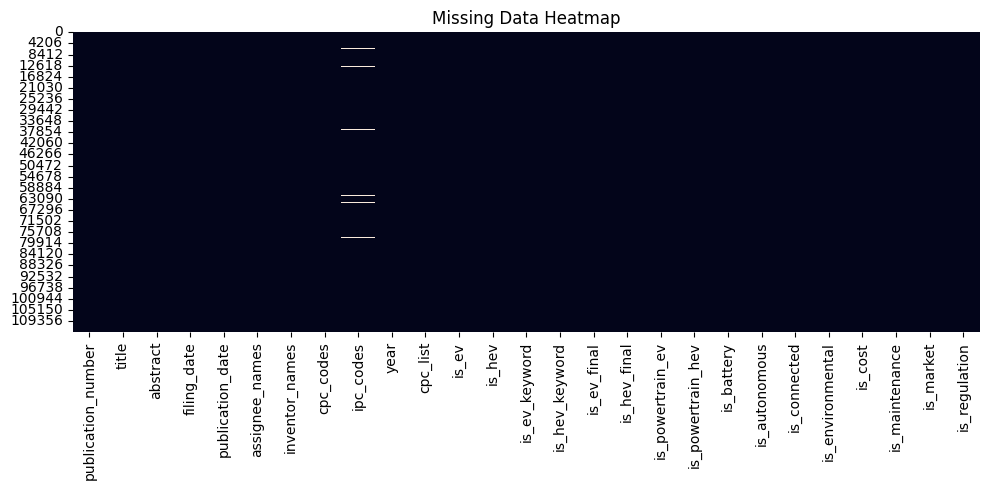

In [17]:
# Visualizing missing data pattern
plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False)
plt.title('Missing Data Heatmap')
plt.tight_layout()
plt.savefig('missing_data_heatmap.png')
plt.show()
plt.close()

This section evaluates data quality by calculating and displaying the percentage of missing values per column and visualizing missing data patterns with a heatmap. This ensures the dataset is reliable for analysis

### Time-series: patents per year by category
Counting total, EV, and HEV patents per year to track innovation trends

In [18]:
# Patents per year by category
yearly_total = df.groupby('year').size().rename('total')
yearly_ev = df[df['is_ev_final']].groupby('year').size().rename('EV')
yearly_hev = df[df['is_hev_final']].groupby('year').size().rename('HEV')
yearly_counts = pd.concat([yearly_total, yearly_ev, yearly_hev], axis=1).fillna(0).astype(int)

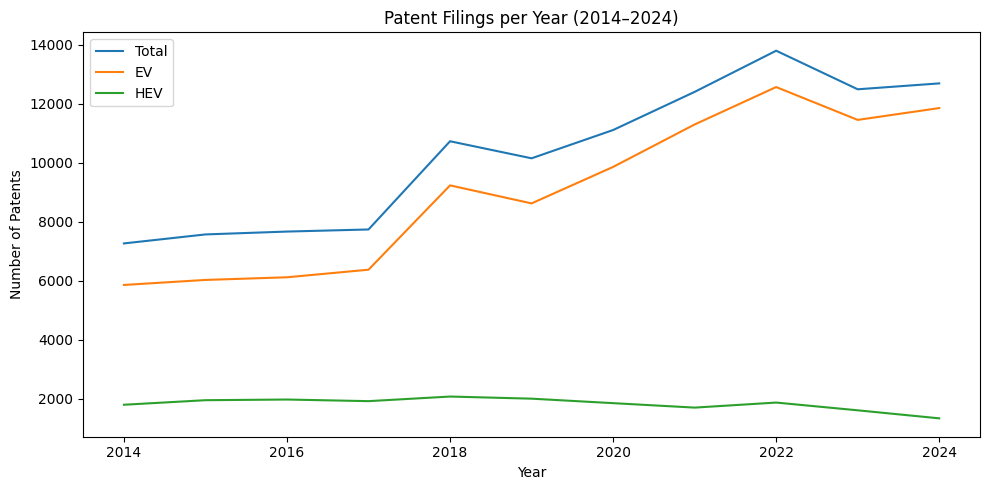

In [19]:
# Visualizing patent filings per year to compare total, EV, and HEV patent trends from 2014–2024
plt.figure(figsize=(10, 5))
plt.plot(yearly_counts.index, yearly_counts['total'], label='Total')
plt.plot(yearly_counts.index, yearly_counts['EV'], label='EV')
plt.plot(yearly_counts.index, yearly_counts['HEV'], label='HEV')
plt.title('Patent Filings per Year (2014–2024)')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.legend()
plt.tight_layout()
plt.savefig('patent_filings_per_year.png')
plt.show()
plt.close()

This block analyzes patent filing trends by counting patents per year for total, EV, and HEV categories and plotting them in a line graph


### Powertrain-specific time-series
Counting EV and HEV powertrain patents per year to focus on a key business factor

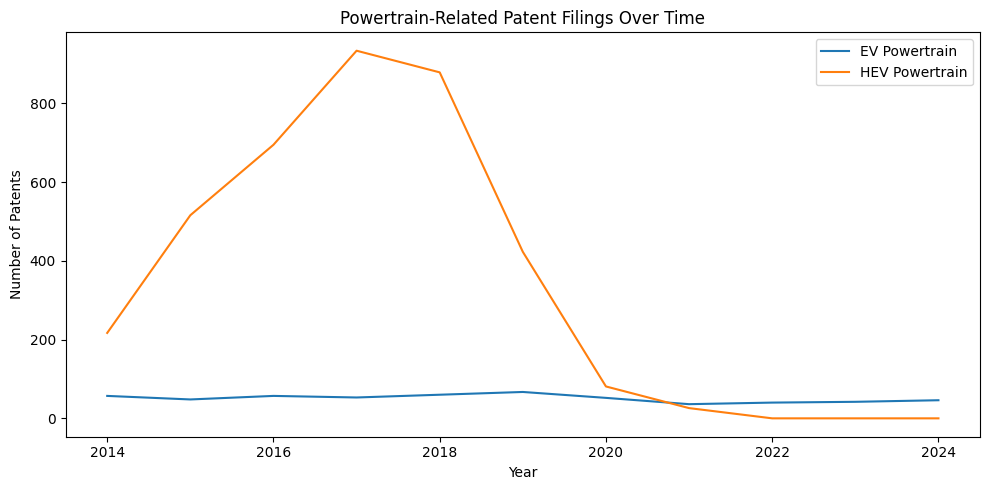

In [20]:
# Analyzing and Visualizing powertrain specific time-series
yearly_powertrain_ev = df[df['is_powertrain_ev']].groupby('year').size().rename('EV Powertrain')
yearly_powertrain_hev = df[df['is_powertrain_hev']].groupby('year').size().rename('HEV Powertrain')
yearly_powertrain = pd.concat([yearly_powertrain_ev, yearly_powertrain_hev], axis=1).fillna(0).astype(int)
yearly_powertrain.plot(kind='line', figsize=(10, 5))
plt.title('Powertrain-Related Patent Filings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.legend()
plt.tight_layout()
plt.savefig('powertrain_patents_over_time.png')
plt.show()
plt.close()

This section focuses on powertrain technology, a key business factor, by counting and visualizing EV and HEV powertrain patents over time. It uses specific CPC codes to isolate powertrain innovations, addressing the business emphasis on powertrain technology and providing insights into a critical area of EV and HEV development

### Battery-specific time-series
Counting battery patents per year to address battery and charging infrastructure

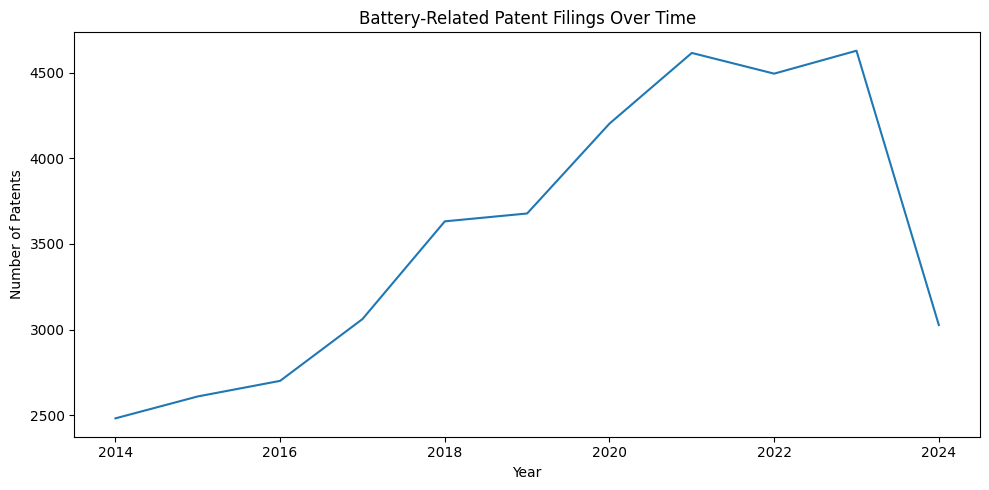

In [21]:
# Analyzing and Visualizing battery specific time-series
yearly_battery = df[df['is_battery']].groupby('year').size().rename('Battery')
yearly_battery.plot(kind='line', figsize=(10, 5))
plt.title('Battery-Related Patent Filings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.tight_layout()
plt.savefig('battery_patents_over_time.png')
plt.show()
plt.close()

This block examines battery and charging infrastructure, another business factor, by counting and plotting battery-related patents over time. It uses CPC codes to identify battery innovations, addressing the business focus on this area and highlighting its role in EV growth


### Autonomous and connected technologies
Counting patents related to autonomous and connected technologies per year

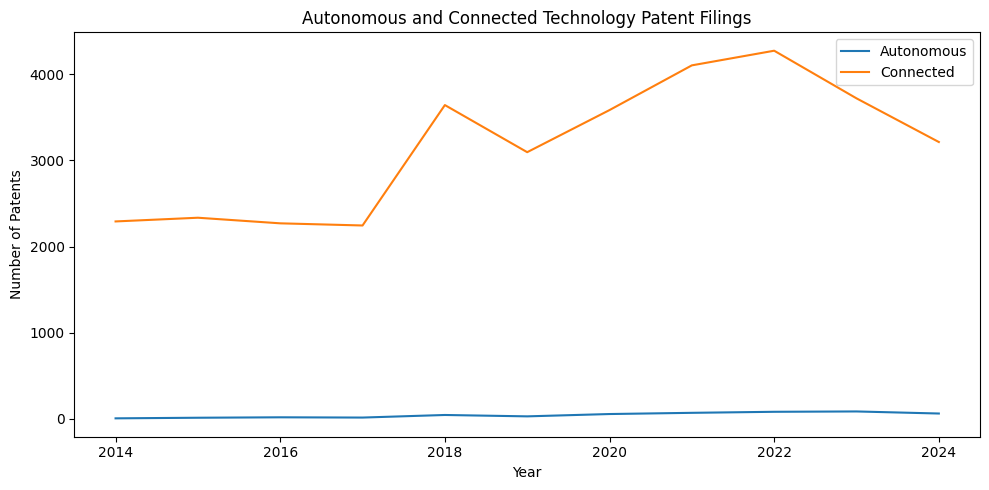

In [22]:
# Analyzing and Visualizing autonomous and connected technology patents
yearly_autonomous = df[df['is_autonomous']].groupby('year').size().rename('Autonomous')
yearly_connected = df[df['is_connected']].groupby('year').size().rename('Connected')
yearly_tech = pd.concat([yearly_autonomous, yearly_connected], axis=1).fillna(0).astype(int)
yearly_tech.plot(kind='line', figsize=(10, 5))
plt.title('Autonomous and Connected Technology Patent Filings')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.legend()
plt.tight_layout()
plt.savefig('autonomous_connected_patents.png')
plt.show()
plt.close()

This section analyzes patents related to autonomous and connected technologies, addressing the business factor on innovation in these areas. It counts and visualizes patents over time, using keyword searches to identify relevant innovations, providing insights into smart vehicle trends

### Keyword-based analysis for business factors
Calculating the proportion of EV and HEV patents mentioning environmental, cost, etc

Proportion of EV patents mentioning Environmental: 0.01
Proportion of HV patents mentioning Environmental: 0.01
Proportion of EV patents mentioning Cost: 0.07
Proportion of HV patents mentioning Cost: 0.02
Proportion of EV patents mentioning Maintenance: 0.02
Proportion of HV patents mentioning Maintenance: 0.01
Proportion of EV patents mentioning Market: 0.01
Proportion of HV patents mentioning Market: 0.01
Proportion of EV patents mentioning Regulation: 0.02
Proportion of HV patents mentioning Regulation: 0.02


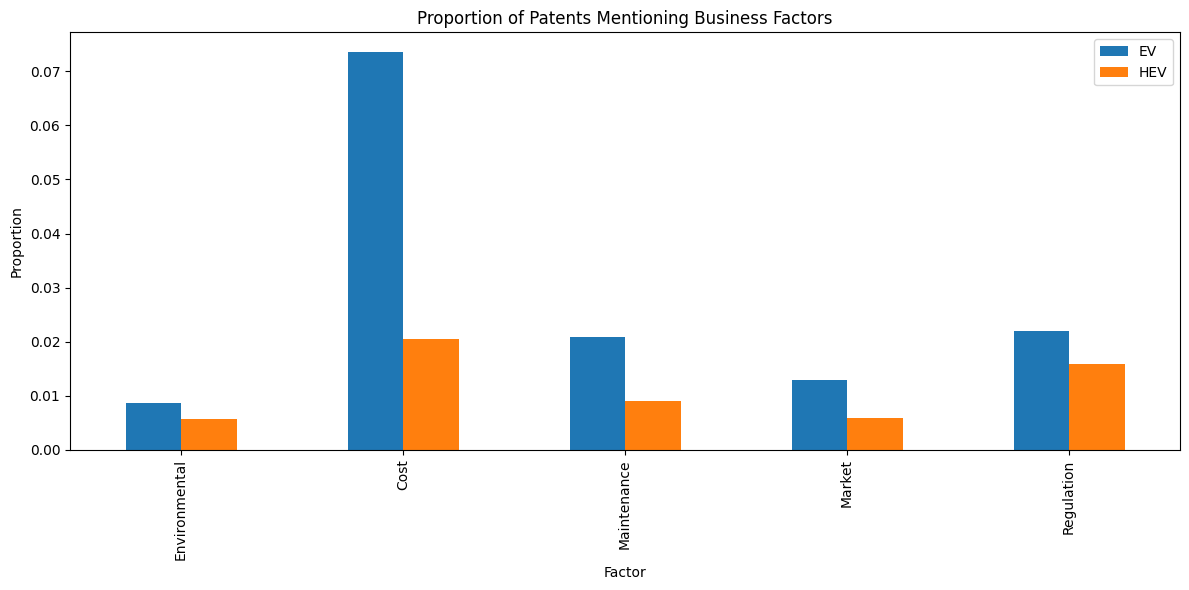

In [23]:
# Analyzing and Calculating business factors
business_factors = {
    'Environmental': df['is_environmental'],
    'Cost': df['is_cost'],
    'Maintenance': df['is_maintenance'],
    'Market': df['is_market'],
    'Regulation': df['is_regulation']
}

for factor, condition in business_factors.items():
    ev_prop = df[df['is_ev_final'] & condition].shape[0] / df[df['is_ev_final']].shape[0] if df[df['is_ev_final']].shape[0] > 0 else 0
    hev_prop = df[df['is_hev_final'] & condition].shape[0] / df[df['is_hev_final']].shape[0] if df[df['is_hev_final']].shape[0] > 0 else 0
    print(f"Proportion of EV patents mentioning {factor}: {ev_prop:.2f}")
    print(f"Proportion of HV patents mentioning {factor}: {hev_prop:.2f}")

# Visualizing business factor proportions
factor_data = []
for factor, condition in business_factors.items():
    factor_data.append({
        'Factor': factor,
        'EV': df[df['is_ev_final'] & condition].shape[0] / df[df['is_ev_final']].shape[0] if df[df['is_ev_final']].shape[0] > 0 else 0,
        'HEV': df[df['is_hev_final'] & condition].shape[0] / df[df['is_hev_final']].shape[0] if df[df['is_hev_final']].shape[0] > 0 else 0
    })
factor_df = pd.DataFrame(factor_data)
factor_df.set_index('Factor')[['EV', 'HEV']].plot(kind='bar', figsize=(12, 6))
plt.title('Proportion of Patents Mentioning Business Factors')
plt.ylabel('Proportion')
plt.tight_layout()
plt.savefig('business_factors_bar.png')
plt.show()
plt.close()

This block addresses the business factors (environmental impact, cost, maintenance, market, regulation) by calculating and visualizing the proportion of EV and HEV patents mentioning relevant keywords

### Text preprocessing for topic modeling
Converting abstracts to a document-term matrix, removing common words for LDA

In [24]:
stop_words = stopwords.words('english')
vectorizer = CountVectorizer(max_df=0.95, min_df=20, stop_words=stop_words)
dtm = vectorizer.fit_transform(df['abstract'].str.lower())

### Modeling : Latent Dirichlet Allocation (LDA)
Extracting latent themes from patent abstracts to identify sub-technologies

In [25]:
n_topics = 8
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(dtm)

LatentDirichletAllocation(n_components=8, random_state=0)

Identifing the most representative words to describe each topic

In [26]:
# Extract top words for each topic
topics = []
feature_names = vectorizer.get_feature_names_out()
for idx, comp in enumerate(lda.components_):
    top_indices = comp.argsort()[-10:][::-1]
    topics.append([feature_names[i] for i in top_indices])

topic_df = pd.DataFrame(topics, columns=[f'Word{i+1}' for i in range(10)])
topic_df.insert(0, 'Topic', range(n_topics))
print("Top Words per Topic:")
print(topic_df)

Top Words per Topic:
   Topic     Word1     Word2    Word3        Word4     Word5     Word6  \
0      0   battery      pack  vehicle     electric       one     first   
1      1  electric   vehicle     body        plate       end  arranged   
2      2  charging  electric  vehicle       module    system   control   
3      3      heat   cooling      air  temperature    system  electric   
4      4     first    second     gear        shaft     motor    output   
5      5     motor     wheel    speed      vehicle   driving     brake   
6      6     power  electric  battery      vehicle   voltage      unit   
7      7   vehicle    engine  control       hybrid  electric    torque   

          Word7        Word8      Word9     Word10  
0         least    plurality   includes  electrode  
1         frame      utility       side  connected  
2        method  information  invention       data  
3         water      vehicle    heating      valve  
4  transmission    connected      input      po

This section applies NLP to patent abstracts using LDA to identify eight sub-technologies. It preprocesses text by removing stopwords and converting abstracts to a document-term matrix, then extracts and displays top words per topic


### Word clouds for each topic
Visualizing top words as word clouds to illustrate thematic content

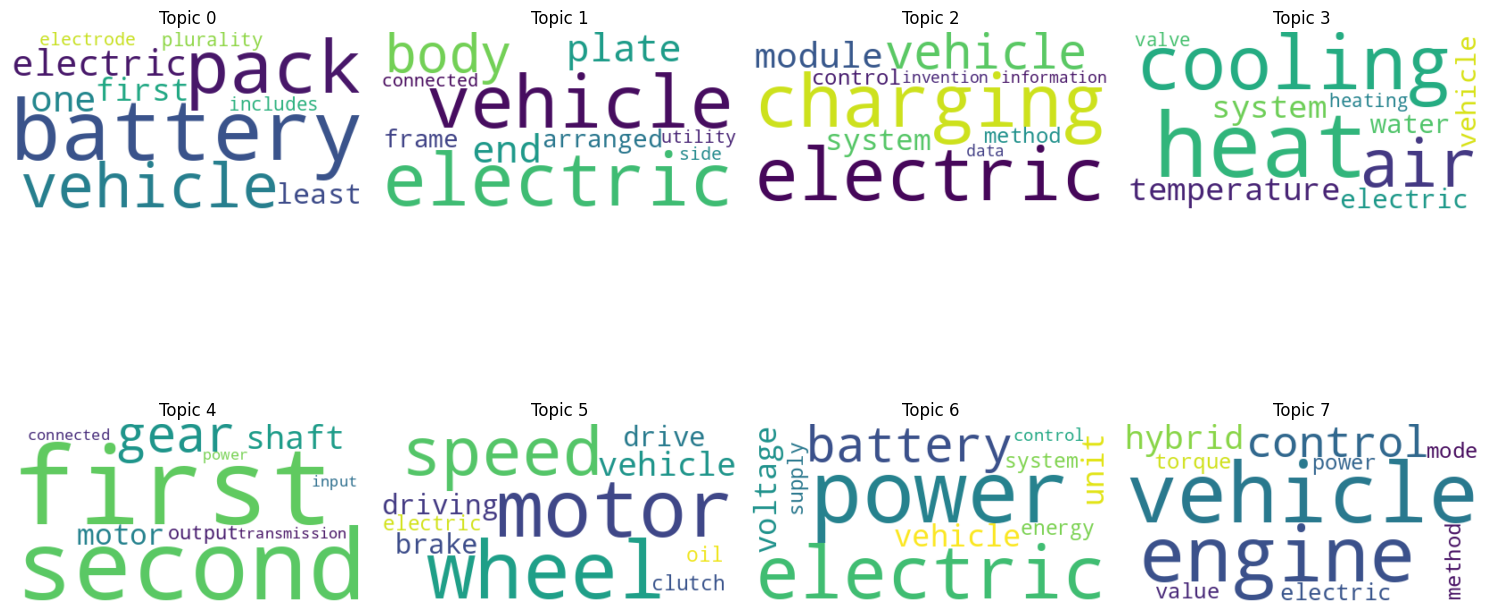

In [27]:
# Visualize Word clouds for each topic
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()
for i, words in enumerate(topics):
    wc = WordCloud(background_color='white').generate(' '.join(words))
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Topic {i}')
plt.tight_layout()
plt.savefig('topic_word_clouds.png')
plt.show()
plt.close()

This block creates word clouds for each LDA topic, visually representing the most prominent words. It aids in interpreting sub-technologies

### Topic distribution counts
Counting patents per topic per year to track sub-technology evolution

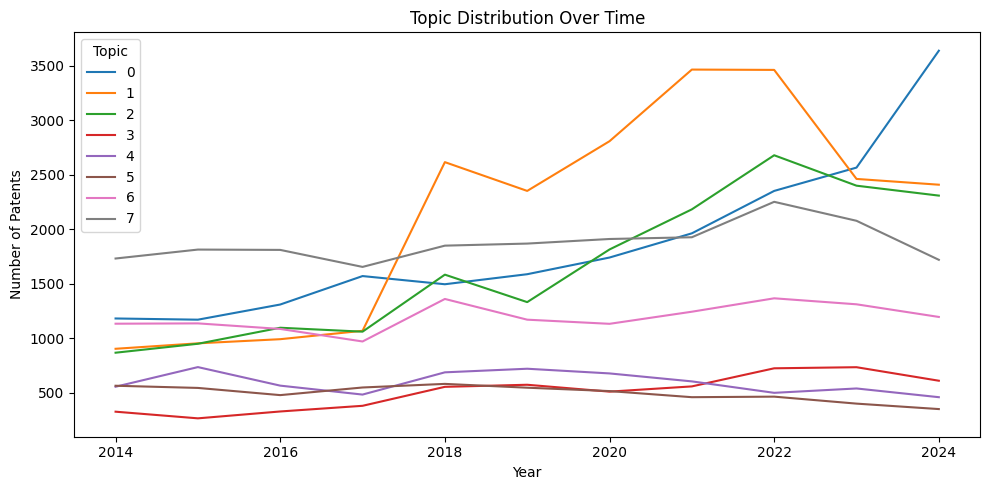

In [28]:
# Identify and Visualize topic trends
df['topic'] = lda.transform(dtm).argmax(axis=1)
yearly_topics = df.groupby(['year', 'topic']).size().unstack(fill_value=0)
yearly_topics.plot(kind='line', figsize=(10, 5))
plt.title('Topic Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.legend(title='Topic')
plt.tight_layout()
plt.savefig('topic_distribution_over_time.png')
plt.show()
plt.close()

This section examines how sub-technologies evolve by counting patents per topic per year and plotting trends

### Top 10 assignees
Counting patents per assignee to identify leading companies

Top 10 Patent Assignees:
          assignee_list  count
0                   MIX  14812
1  HYUNDAI MOTOR CO LTD   4482
2   TOYOTA MOTOR CO LTD   3687
3     TOYOTA MOTOR CORP   2534
4       KIA MOTORS CORP   2106
5  FORD GLOBAL TECH LLC   1887
6          NISSAN MOTOR   1827
7    HONDA MOTOR CO LTD   1518
8            BYD CO LTD   1408
9              KIA CORP    959


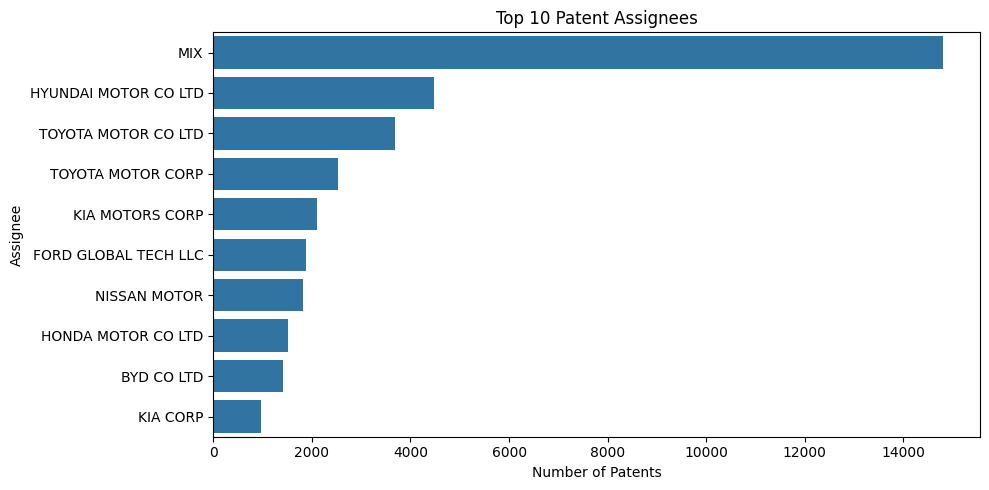

In [29]:
# Identify and Visualize top assignees
df['assignee_list'] = df['assignee_names'].str.split(r',\s*')
assignees = df.explode('assignee_list')
top_assignees = assignees['assignee_list'].value_counts().head(10)
print("Top 10 Patent Assignees:")
print(top_assignees.rename('count').reset_index().rename(columns={'index': 'assignee'}))
plt.figure(figsize=(10, 5))
sns.barplot(x=top_assignees.values, y=top_assignees.index)
plt.title('Top 10 Patent Assignees')
plt.xlabel('Number of Patents')
plt.ylabel('Assignee')
plt.tight_layout()
plt.savefig('top_assignees.png')
plt.show()
plt.close()

This block identifies the top 10 patent assignees and visualizes their patent counts in a bar chart

### Statistical tests

In [30]:
# Chi-square test for topic distribution
ev_topics = pd.Series(df['topic'][df['is_ev_final']]).value_counts().sort_index()
hev_topics = pd.Series(df['topic'][df['is_hev_final']]).value_counts().sort_index()
ev_topics = ev_topics.reindex(range(n_topics), fill_value=0)
hev_topics = hev_topics.reindex(range(n_topics), fill_value=0)
contingency = pd.DataFrame({'EV': ev_topics, 'HEV': hev_topics})
chi2, p, dof, expected = chi2_contingency(contingency.values)
print(f"Chi-square statistic: {chi2:.2f}, p-value: {p:.4f}")

Chi-square statistic: 27427.68, p-value: 0.0000


In [31]:
# T-test for comparing mean patent counts
ev_counts = yearly_counts['EV']
hev_counts = yearly_counts['HEV']
t_stat, p_value = ttest_ind(ev_counts, hev_counts)
print(f'T-test: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}')

T-test: t-statistic = 9.19, p-value = 0.0000


This final block conducts statistical tests to validate differences in EV and HEV innovation. The Chi-square test (statistic: 27427.68, p-value: 0.0000) confirms distinct topic distributions, indicating different sub-technologies. The T-test (t-statistic: 9.19, p-value: 0.0000) shows higher EV patent counts, suggesting faster innovation.